В рамках данного кейса нам необходимо помочь фермеру выгодно покупать буренок для его молочного хозяйства "Вольный луг". Качество молока определяется по строгой методике и при этом фермеру необходимо развивать свою хозяйство.Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже.

Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
<div>1.Первая будет прогнозировать возможный удой коровы (целевой признак Удой);</div>
2.Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
<div>1.средний удой за год — не менее 6000 килограммов;</div>
2.молоко должно быть вкусным.

<center> Описание данных </center>
Мы будем работать с тремя датасетами:
<div>ferma_main.csv</div>
<div>ferma_dad.csv</div>
<div>cow_buy.csv</div>

<div>Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
<div>id — уникальный идентификатор коровы.</div>
<div>Удой, кг — масса молока, которую корова даёт в год (в килограммах).</div>
<div>ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.</div>
<div>Сырой протеин, г — содержание сырого протеина в корме (в граммах).</div>
<div>СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.</div>
<div>Порода — порода коровы.</div>
<div>Тип пастбища — ландшафт лугов, на которых паслась корова.</div>
<div>порода папы_быка — порода папы коровы.</div>
<div>Жирность,% — содержание жиров в молоке (в процентах).</div>
<div>Белок,% — содержание белков в молоке (в процентах).</div>
<div>Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).</div>
<div>Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).</div>
<div>Признаки в датасете ferma_main.csv можно разделить на группы.</div>
<div>Характеристики коровы: id, Порода, порода папы_быка, Возраст.</div>
<div>Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).</div>
<div>Характеристика пастбища: Тип пастбища.</div>
<div>Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.</div>
    
Такое разделение поможет нам понять, как взаимосвязаны признаки в датасете.</div>
<div>Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
<div>id — уникальный идентификатор коровы.</div>
<div>Имя Папы — имя папы коровы.</div>
<div>Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
<div>Порода — порода коровы.</div>
<div>Тип пастбища — ландшафт лугов, на которых паслась корова.</div>
<div>порода папы_быка — порода папы коровы.</div>
<div>Имя_папы — имя папы коровы.</div>
<div>Текущая_жирность,% — содержание жиров в молоке (в процентах).</div>
<div>Текущий_уровень_белок,% — содержание белков в молоке (в процентах).</div>
<div>Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).</div>

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

In [1]:
!pip install scikit-learn==1.1.3 -q

In [2]:
pip install missingno -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_absolute_error,
    mean_squared_error
)
import math
from scipy import stats as st
from phik import phik_matrix

In [5]:
farm = pd.read_csv('/datasets/ferma_main.csv', delimiter=';')
dad = pd.read_csv('/datasets/ferma_dad.csv', delimiter=';')
buy_cow = pd.read_csv('/datasets/cow_buy.csv', delimiter=';')

In [6]:
display(farm.head(5))
display(farm.info())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

В этом датафрейме видно, что у некоторых полей не верные названия и типы данных.


In [7]:
display(dad.head(10))
display(dad.info())

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

In [8]:
display(buy_cow.head(10))
display(buy_cow.info())

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

Здесь так же видно, что у некоторых полей не верные названия и типы данных.

##  Предобработка данных

In [9]:
farm.columns = farm.columns.str.lower()

column_mapping = {'удой, кг': 'удой', 'жирность,%': 'жирность', 'белок,%': 'белок','сырой протеин, г':'сырой_протеин',
                 'тип пастбища':'тип_пастбища','порода папы_быка':'порода_папы_быка','вкус молока':'вкус_молока','эке (энергетическая кормовая единица)':'эке','спо (сахаро-протеиновое соотношение)':'спо'}
farm.rename(columns=column_mapping, inplace=True)

farm.columns

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

In [10]:
dad.columns = dad.columns.str.lower()

column_mapping_2 = {'имя папы':'имя_папы'}
dad.rename(columns=column_mapping_2, inplace=True)

dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [11]:
buy_cow.columns = buy_cow.columns.str.lower()

column_mapping_3 = {'тип пастбища':'тип_пастбища','текущая_жирность,%': 'текущая_жирность', 'текущий_уровень_белок,%': 'текущий_уровень_белка','порода папы_быка':'порода_папы_быка'}
buy_cow.rename(columns=column_mapping_3, inplace=True)

buy_cow.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белка', 'возраст'],
      dtype='object')

Изменил названия столбцов на более корректные

## Исследовательский анализ данных

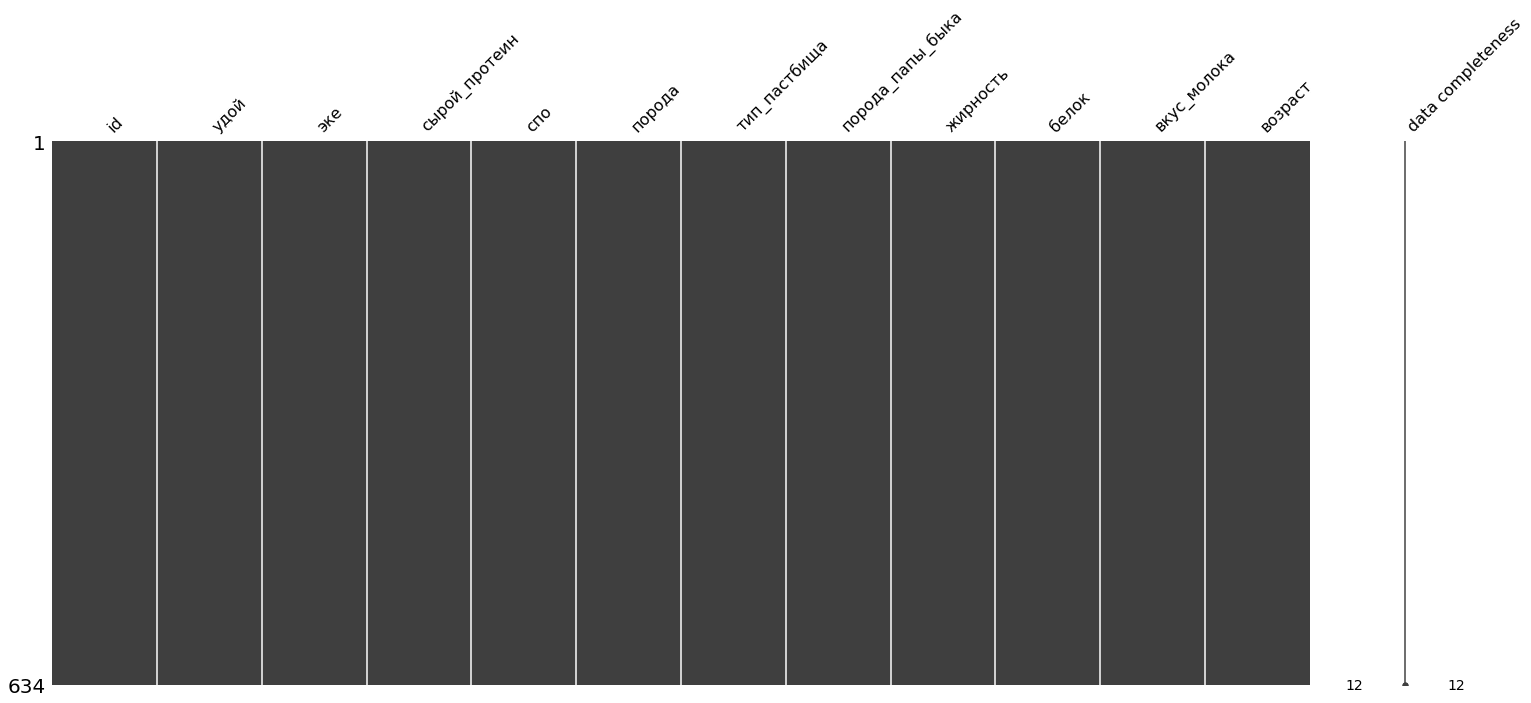

In [12]:
msno.matrix(farm, labels=True)
plt.show()

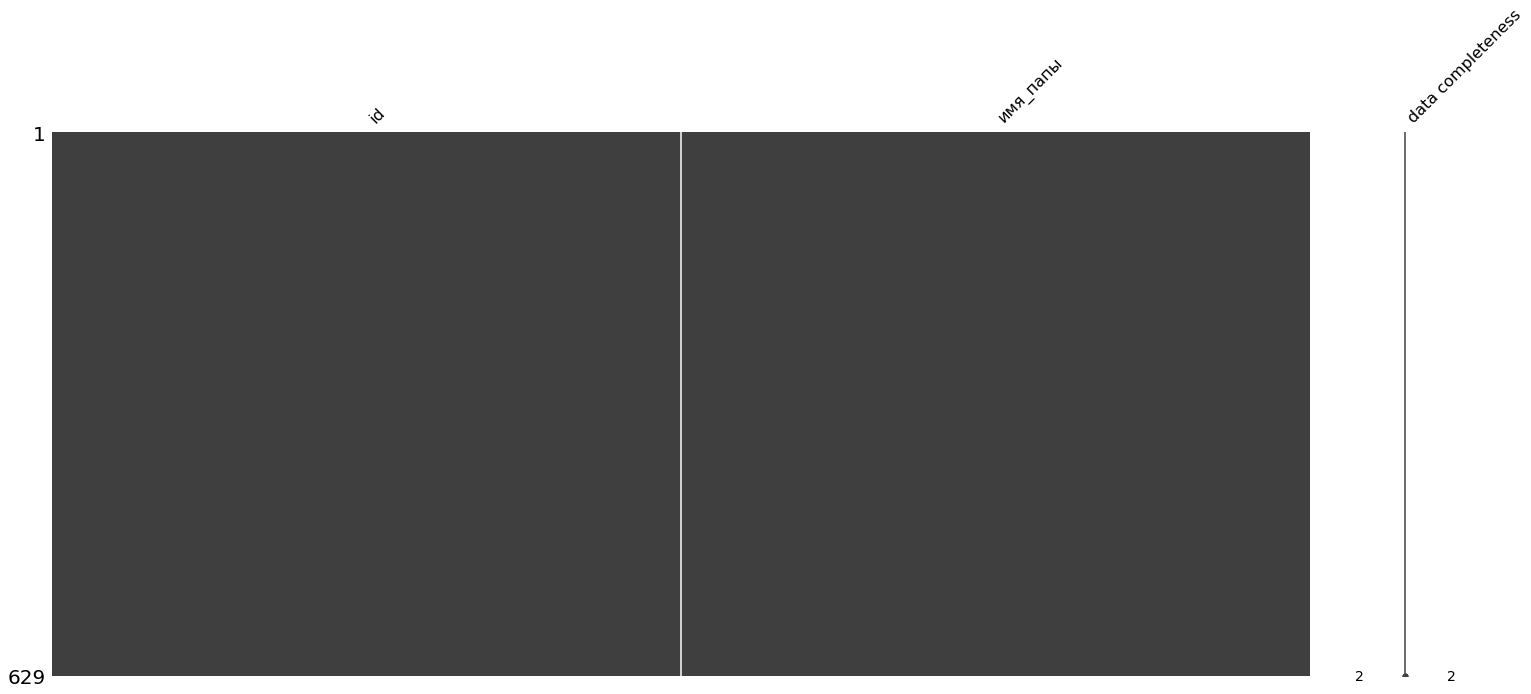

In [13]:
msno.matrix(dad, labels=True)
plt.show()

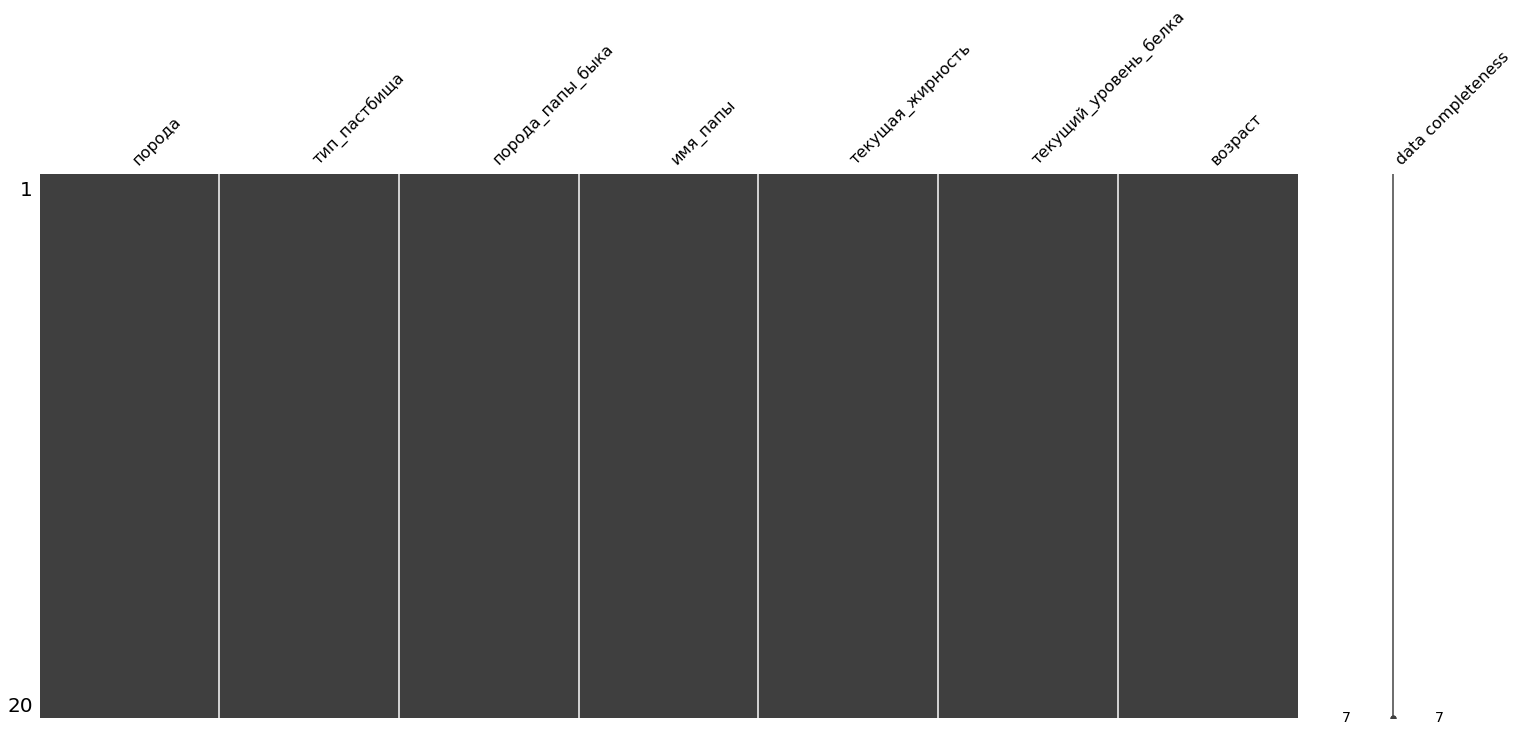

In [14]:
msno.matrix(buy_cow, labels=True)
plt.show()

Пропусков в данных нет

In [15]:
#данные с плавающей точкой не дают изменить тип поэтому необходимо заменить запятые на точки.
farm['эке'] = farm['эке'].replace(',', '.', regex=True).astype(float)
farm['жирность'] = farm['жирность'].replace(',', '.', regex=True).astype(float)
farm['белок'] = farm['белок'].replace(',', '.', regex=True).astype(float)
farm['спо'] = farm['спо'].replace(',', '.', regex=True).astype(float) 

farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой              634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин     634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность          634 non-null    float64
 9   белок             634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [16]:
buy_cow['текущая_жирность'] = buy_cow['текущая_жирность'].replace(',', '.', regex=True).astype(float)
buy_cow['текущий_уровень_белка'] = buy_cow['текущий_уровень_белка'].replace(',', '.', regex=True).astype(float)

buy_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   порода                 20 non-null     object 
 1   тип_пастбища           20 non-null     object 
 2   порода_папы_быка       20 non-null     object 
 3   имя_папы               20 non-null     object 
 4   текущая_жирность       20 non-null     float64
 5   текущий_уровень_белка  20 non-null     float64
 6   возраст                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Изменил типы данных и названия на более корректные

In [17]:
farm.duplicated().sum()
farm = farm.drop_duplicates()

In [18]:
farm['тип_пастбища'] = farm['тип_пастбища'].replace('Равнинные', 'Равнинное', regex=True)
farm['порода_папы_быка'] = farm['порода_папы_быка'].replace('Айдиалл', 'Айдиал', regex=True)

In [19]:
dad.duplicated().sum()

0

## Иследовательский анализ

In [20]:
def plotbar(df,ind,val,func,name,x,y): #написал функцию чтобы не повторялся код
    data=df.pivot_table(index=ind,values=val,aggfunc=func)
    data.plot.bar()
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    
def plotbar_sort(df,ind,val,func,name,x,y):
    data=df.pivot_table(index=ind,values=val,aggfunc=func).sort_values(by=val,ascending=True)
    data.plot.bar()
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    
def plotscatter(x,y,color,x_name,y_name,name):
    plt.scatter(x, y, c=color.astype('category').cat.codes, cmap='viridis', label=color)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(name)
    legend = plt.legend()
    legend.get_texts()[0].set_text('Порода')
    plt.show()


def pie(df,ind,title):
    counts = df[ind].value_counts()#пирог для видов коров
    labels = counts.index
    plt.figure(figsize=(10, 10))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title, y=1.05)
    plt.axis('equal')
    plt.show()

## Анализ данных фермера:

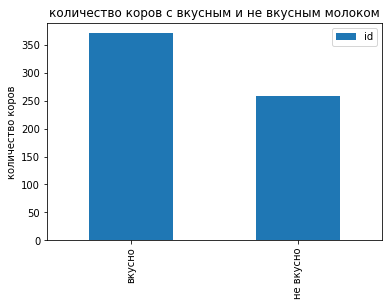

In [21]:
plotbar(farm,'вкус_молока','id','count','количество коров с вкусным и не вкусным молоком','','количество коров')

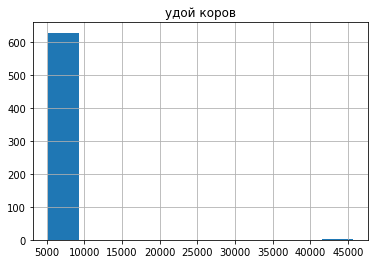

In [22]:
farm['удой'].hist(bins=10)
plt.title('удой коров')
plt.show()

<AxesSubplot:>

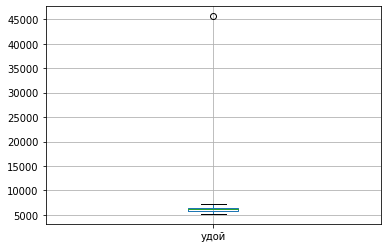

In [23]:
farm.boxplot(column='удой')

In [24]:
farm = farm[farm['удой']<10000]

Основываясь на данные из этих графиков видно, что многие коровы не попадают под одни из главных требований фермера (надой и вкус молока).В данных по удою есть выброс.Скорее всего при записи случайно добавили лишний ноль, тк корова не могла дать 45000 литров молока.

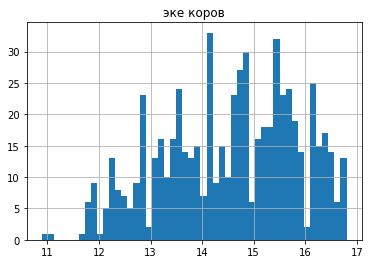

In [25]:
farm['эке'].hist(bins=50)
plt.title('эке коров')
plt.show()

У большей части коров эке в промежутке от 14 до 16

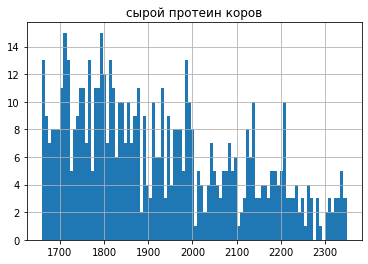

In [26]:
farm['сырой_протеин'].hist(bins=100)
plt.title('сырой протеин коров')
plt.show()

У большей части коров сырой протеин в промежутке от 1700 до 1900

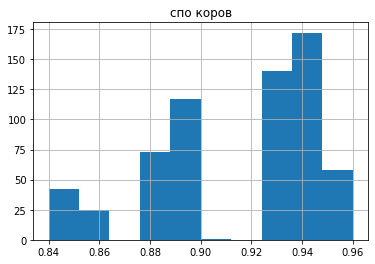

In [27]:
farm['спо'].hist(bins=10)
plt.title('спо коров')
plt.show()

Видно, что СПО разбит на 3 группы, но самая большая в промежутке от 0.93 до 0.96

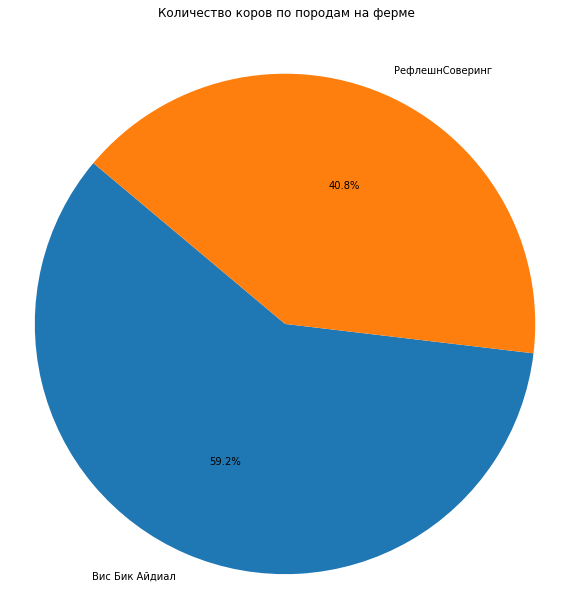

In [28]:
pie(farm,'порода','Количество коров по породам на ферме')

График показал, что всего в продаже 2 вида коров и в большинстве своем, это Вис Бик Айдиал

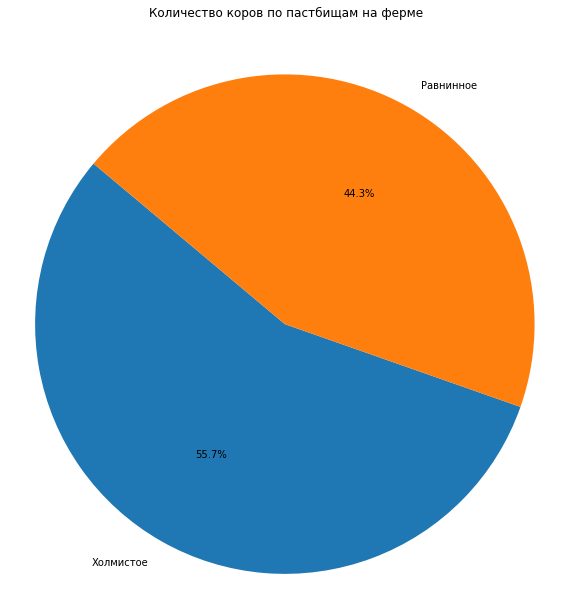

In [29]:
pie(farm,'тип_пастбища','Количество коров по пастбищам на ферме')

График показал, что большая часть коров питается в холмистой местности

In [30]:
dad.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


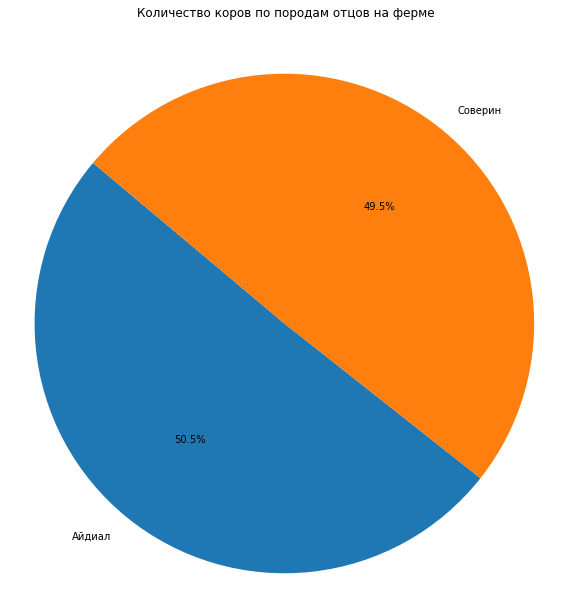

In [31]:
pie(farm,'порода_папы_быка','Количество коров по породам отцов на ферме')

График показал, что большинство отцов породы Айдиал

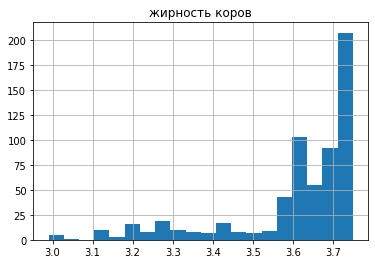

In [32]:
farm['жирность'].hist(bins=20)
plt.title('жирность коров')
plt.show()

<AxesSubplot:>

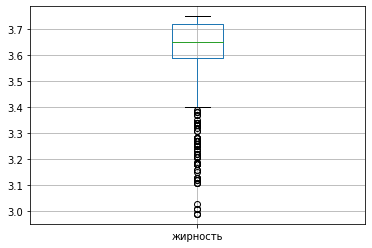

In [33]:
farm.boxplot(column='жирность')

График показал, что большинство коров несут молоко с жирностью от 3.6 до 3.8 процентов.Многие данные по жирности слишком малы, но тк разница в данных не велика, эти выбросы я не стану обрабатывать.

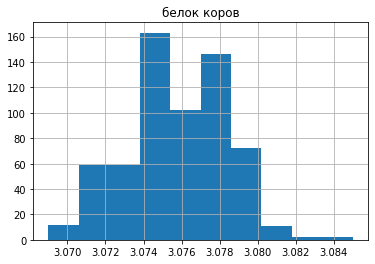

In [34]:
farm['белок'].hist(bins=10)
plt.title('белок коров')
plt.show()

<AxesSubplot:>

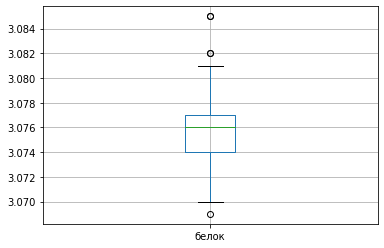

In [35]:
farm.boxplot(column='белок')

График показал, что большинство коров несут молоко с белком от 3.074 до 3.08 процентов.Так же графики показали, что в данных есть выбросы, но они не значительны поэтому с ними я ничего не делаю.

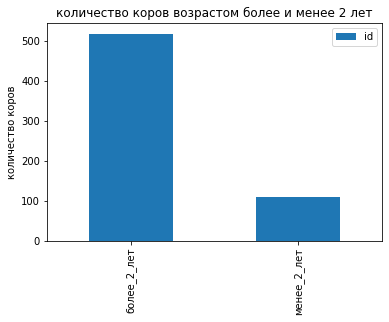

In [36]:
plotbar(farm,'возраст','id','count','количество коров возрастом более и менее 2 лет','','количество коров')

График показал, что большинство коров старше 2 лет

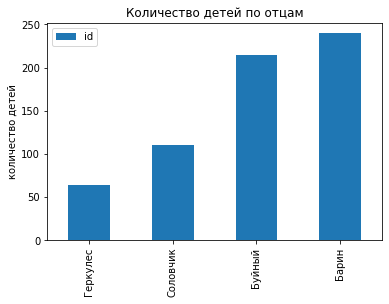

In [37]:
plotbar_sort(dad, 'имя_папы', 'id', 'count', 'Количество детей по отцам', '', 'количество детей')

График показал, что самым плодовитым оказался Барин.

Общий итог по фермера:Анализ данных фермера показал, что многие из его коров не соответсвуют требованиям для новых коров(вкус, количесто надоя).Возможно фермеру стоит внимательнее изучить своих коров.

## Анализ данных пастбищ «ЭкоФерма»:

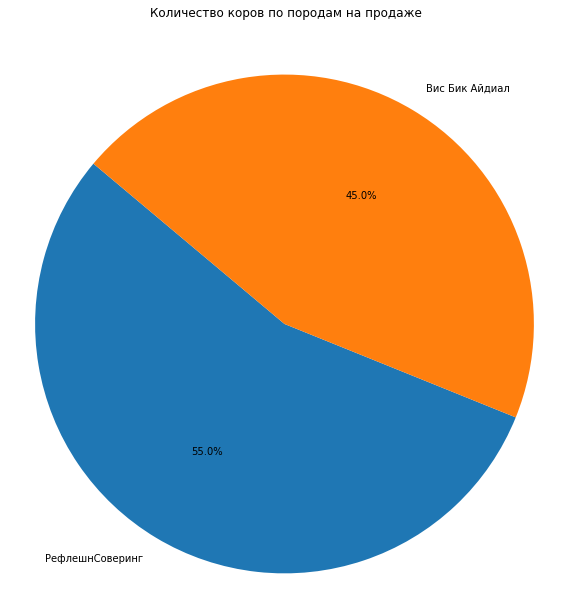

In [38]:
pie(buy_cow,'порода','Количество коров по породам на продаже')

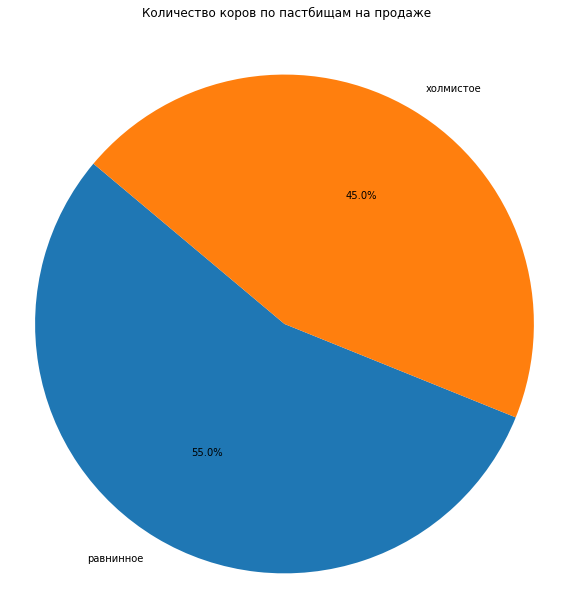

In [39]:
pie(buy_cow,'тип_пастбища','Количество коров по пастбищам на продаже')

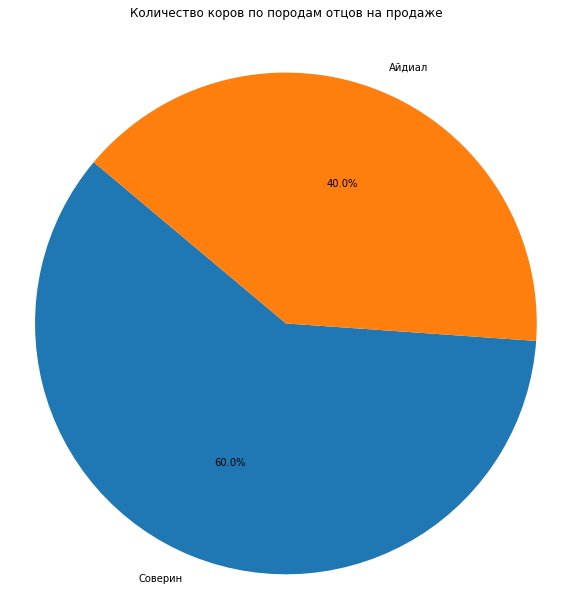

In [40]:
pie(buy_cow,'порода_папы_быка','Количество коров по породам отцов на продаже')

Большинство отцов коров на продаже породы Соверин

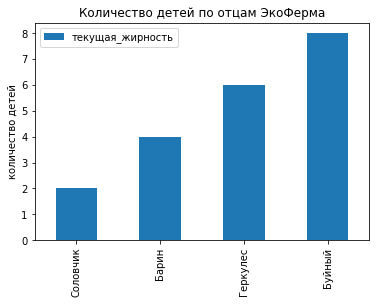

In [41]:
plotbar_sort(buy_cow, 'имя_папы', 'текущая_жирность', 'count', 'Количество детей по отцам ЭкоФерма', '', 'количество детей')

В ЭкоФерме самым плодовитым оказался Буйный

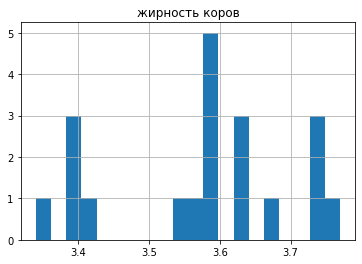

In [42]:
buy_cow['текущая_жирность'].hist(bins=20)
plt.title('жирность коров')
plt.show()

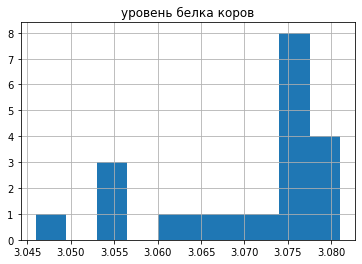

In [43]:
buy_cow['текущий_уровень_белка'].hist(bins=10)
plt.title('уровень белка коров')
plt.show()

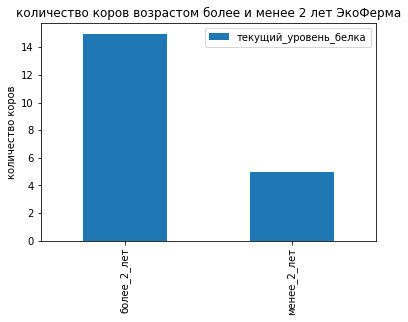

In [44]:
plotbar(buy_cow,'возраст','текущий_уровень_белка','count','количество коров возрастом более и менее 2 лет ЭкоФерма','','количество коров')

Анализ данных показал, что большая часть коров ЭкоФермы уже выросла.

## Корреляционный анализ

interval columns not set, guessing: ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


<AxesSubplot:>

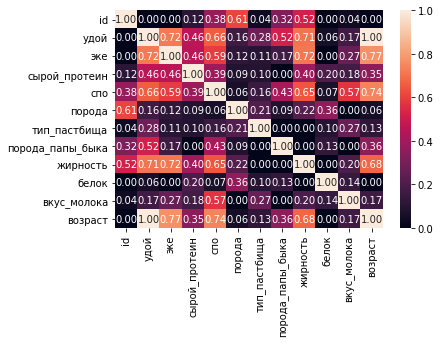

In [45]:
sns.heatmap(phik_matrix(farm), annot=True, fmt='.2f') 

График показал, что удой больше всего зависит от эке и жирности, а вкус молока имеет ощутимую зависимость от спо.

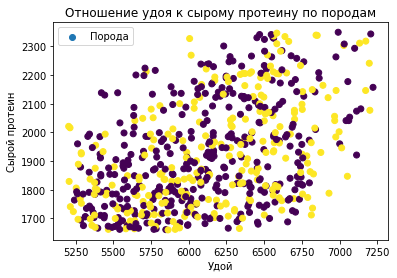

In [46]:
plotscatter(farm['удой'],farm['сырой_протеин'],farm['порода'],'Удой','Сырой протеин','Отношение удоя к сырому протеину по породам')

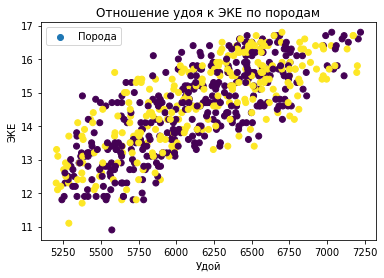

In [47]:
plotscatter(farm['удой'],farm['эке'],farm['порода'],'Удой','ЭКЕ','Отношение удоя к ЭКЕ по породам')

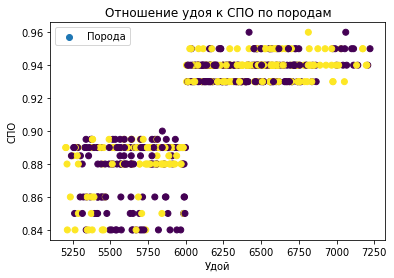

In [48]:
plotscatter(farm['удой'],farm['спо'],farm['порода'],'Удой','СПО','Отношение удоя к СПО по породам')

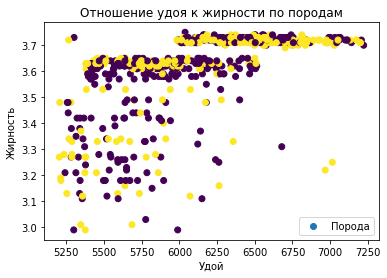

In [49]:
plotscatter(farm['удой'],farm['жирность'],farm['порода'],'Удой','Жирность','Отношение удоя к жирности по породам')

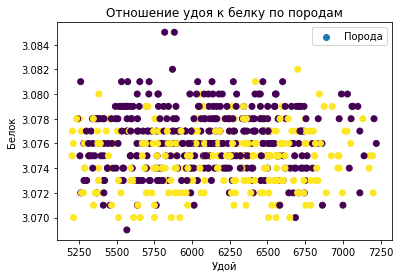

In [50]:
plotscatter(farm['удой'],farm['белок'],farm['порода'],'Удой','Белок','Отношение удоя к белку по породам')

Линейная зависимость наблюдается только у удоя c эке.Отношения жирности и спо к породам имеею характер зависимости - кластериация. Отношения удоя и сырово проетеина не имеют зависимости, поэтому данные расположены хаотично.Насчет отношения белка к породам я не уверен, но скорее всего тоже кластеризация.

## Обучение модели линейной регрессии

In [51]:
farm.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [52]:
RANDOM_STATE = 42

X = farm.drop('удой', axis=1)
y = farm['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

model_lr = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

numerical_columns = ['эке','спо','сырой_протеин']
categorical_columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

scaler.fit(X_train[numerical_columns])
encoder.fit(X_train[categorical_columns])

x_trained_scaled = scaler.transform(X_train[numerical_columns])
x_test_scaled = scaler.transform(X_test[numerical_columns])

x_trained_encoded = encoder.transform(X_train[categorical_columns])
x_test_encoded = encoder.transform(X_test[categorical_columns])

x_trained_scaled_encoded = np.concatenate([x_trained_scaled, x_trained_encoded.toarray()], axis=1)
x_test_scaled_encoded = np.concatenate([x_test_scaled, x_test_encoded.toarray()], axis=1)

model_lr.fit(x_trained_scaled_encoded, y_train)

predictions = model_lr.predict(x_test_scaled_encoded)

r2 = r2_score(y_test, predictions)
mae1 = mean_absolute_error(y_test, predictions)
mse1 = mean_squared_error(y_test, predictions)
rmse1 = math.sqrt(mse1)

print(f'Предсказание: {predictions[0]}')
print(f'Реальное значение: {y_test.iloc[0]}')
print(f'Остаток = {predictions[0]-y_test.iloc[0]}')
print("R2 Linear Regression =", r2)

Предсказание: 6031.538080695898
Реальное значение: 5980
Остаток = 51.538080695898316
R2 Linear Regression = 0.7844078173416967


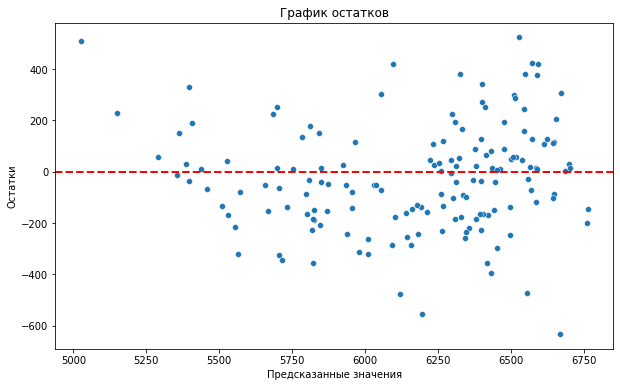

In [53]:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

Линейная модель верно предсказывает данные в 78 процентах случаев.Чаще и сильнее ошибается на крайних значениях, особенно с предсказанием высокого удоя.

In [54]:
spo_threshold = 0.90 

farm['спо_binary'] = (farm['спо'] > spo_threshold).astype(int)
farm['эке_квадрат'] = (farm['эке'] ** 2).astype(float)

numerical_columns = ['эке_квадрат','сырой_протеин']
categorical_columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст', 'спо_binary']

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно  
</div>  

In [55]:
RANDOM_STATE = 42

X = farm.drop('удой', axis=1)
y = farm['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

model_lr = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

scaler.fit(X_train[numerical_columns])
encoder.fit(X_train[categorical_columns])

x_trained_scaled = scaler.transform(X_train[numerical_columns])
x_test_scaled = scaler.transform(X_test[numerical_columns])

x_trained_encoded = encoder.transform(X_train[categorical_columns])
x_test_encoded = encoder.transform(X_test[categorical_columns])

x_trained_scaled_encoded = np.concatenate([x_trained_scaled, x_trained_encoded.toarray()], axis=1)
x_test_scaled_encoded = np.concatenate([x_test_scaled, x_test_encoded.toarray()], axis=1)

model_lr.fit(x_trained_scaled_encoded, y_train)

predictions = model_lr.predict(x_test_scaled_encoded)

r2 = r2_score(y_test, predictions)
mae2 = mean_absolute_error(y_test, predictions)
mse2 = mean_squared_error(y_test, predictions)
rmse2 = math.sqrt(mse2)

print(f'Предсказание: {predictions[0]}')
print(f'Реальное значение: {y_test.iloc[0]}')
print(f'Остаток = {predictions[0]-y_test.iloc[0]}')
print(f'R2 = {r2}')

Предсказание: 5936.069835768059
Реальное значение: 5980
Остаток = -43.93016423194058
R2 = 0.8200973677186288


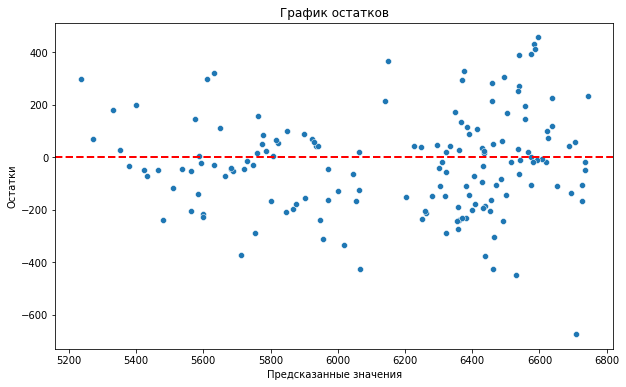

In [56]:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

Линеная модель верно предсказывает данные в 82 процентах случаев.Чаще и сильнее ошибается на крайних значениях, особенно с предсказанием высокого удоя.

In [57]:
farm_full = farm.merge(right=dad,on='id')
farm_full.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_binary,эке_квадрат,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [58]:
numerical_columns = ['эке_квадрат','сырой_протеин']
categorical_columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст', 'спо_binary','имя_папы']

In [59]:
RANDOM_STATE = 42

X = farm_full.drop('удой', axis=1)
y = farm_full['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

model_lr = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

scaler.fit(X_train[numerical_columns])
encoder.fit(X_train[categorical_columns])

x_trained_scaled = scaler.transform(X_train[numerical_columns])
x_test_scaled = scaler.transform(X_test[numerical_columns])

x_trained_encoded = encoder.transform(X_train[categorical_columns])
x_test_encoded = encoder.transform(X_test[categorical_columns])

x_trained_scaled_encoded = np.concatenate([x_trained_scaled, x_trained_encoded.toarray()], axis=1)
x_test_scaled_encoded = np.concatenate([x_test_scaled, x_test_encoded.toarray()], axis=1)

model_lr.fit(x_trained_scaled_encoded, y_train)

predictions3 = model_lr.predict(x_test_scaled_encoded)

r2 = r2_score(y_test, predictions3)
mae3 = mean_absolute_error(y_test, predictions3)
mse3 = mean_squared_error(y_test, predictions3)
rmse3 = math.sqrt(mse3)

print(f'Предсказание: {predictions3[0]}')
print(f'Реальное значение: {y_test.iloc[0]}')
print(f'Остаток = {predictions3[0]-y_test.iloc[0]}')
print(f'R2 ={r2}')

Предсказание: 6004.81835110037
Реальное значение: 5980
Остаток = 24.81835110036991
R2 =0.8262863382397996


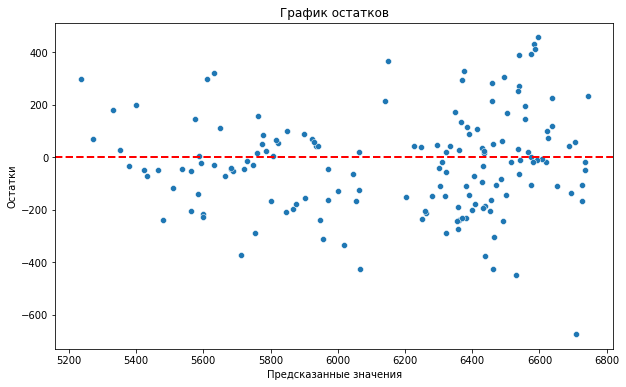

In [60]:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

Линеная модель верно предсказывает данные в 83 процентах случаев.Чаще и сильнее ошибается на крайних значениях, особенно с предсказанием высокого удоя.

In [61]:
print(mae1)
print(mae2)
print(mae3)

164.2419446347492
147.77939186178455
144.71452607169226


In [62]:
print(mse1)
print(mse2)
print(mse3)

43887.01500966051
36621.87295410216
35362.01538965858


In [63]:
print(rmse1)
print(rmse2)
print(rmse3)

209.4922791170608
191.36842204005904
188.04790716638828


Самые маленькие ошибки получается в 3 модели.Ее и выберу как итоговую.

In [64]:
print('95% доверительный интервал =', st.norm.interval(0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

95% доверительный интервал = (6093.573683581589, 6222.856638026672)


In [65]:
new_columns = ['эке','сырой_протеин','спо']
buy_cow[new_columns] = farm[new_columns].mean()+farm[new_columns].mean()*0.05
buy_cow.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белка,возраст,эке,сырой_протеин,спо
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


In [66]:
spo_threshold = 0.90 

buy_cow['спо_binary'] = (buy_cow['спо'] > spo_threshold).astype(int)
buy_cow['эке_квадрат'] = (buy_cow['эке'] ** 2).astype(float)

numerical_columns = ['эке_квадрат','сырой_протеин']
categorical_columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_binary','имя_папы']

In [67]:
RANDOM_STATE = 42

X = farm_full.drop('удой', axis=1)
y = farm_full['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

model_lr = LinearRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first',handle_unknown='ignore')

scaler.fit(X_train[numerical_columns])
encoder.fit(X_train[categorical_columns])

x_train_scaled = scaler.transform(X_train[numerical_columns])
x_test_scaled = scaler.transform(X_test[numerical_columns])

x_train_encoded = encoder.transform(X_train[categorical_columns])
x_test_encoded = encoder.transform(X_test[categorical_columns])

x_train_scaled_encoded = np.concatenate([x_train_scaled, x_train_encoded.toarray()], axis=1)
x_test_scaled_encoded = np.concatenate([x_test_scaled, x_test_encoded.toarray()], axis=1)

model_lr.fit(x_train_scaled_encoded, y_train)

X_test_new = buy_cow

x_test_new_scaled = scaler.transform(X_test_new[numerical_columns])
x_test_new_encoded = encoder.transform(X_test_new[categorical_columns])
x_test_new_scaled_encoded = np.concatenate([x_test_new_scaled, x_test_new_encoded.toarray()], axis=1)


predictions_milk_yiald = model_lr.predict(x_test_new_scaled_encoded)


print(f'Предсказание: {predictions_milk_yiald}')

Предсказание: [6558.9759866  6378.71102836 6283.99977532 6542.14606633 6542.14606633
 6425.38021759 6558.9759866  6571.25973712 6283.99977532 6349.59735757
 6293.76454954 6617.92892634 6558.9759866  6076.53143209 6283.99977532
 6542.14606633 6293.76454954 6425.38021759 6571.25973712 6542.14606633]


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Модель предсказала, что фермеру стоит купить 16 коров по признаку удоя.

## Обучение модели логистической регрессии

In [68]:
spo_threshold = 0.90 

farm['спо_binary'] = (farm['спо'] > spo_threshold).astype(int)
farm['эке_квадрат'] = (farm['эке'] ** 2).astype(float)
farm['вкус_молока'] = farm['вкус_молока'].replace({'вкусно':1,'не вкусно':0})

numerical_columns = ['эке_квадрат','сырой_протеин','удой']
categorical_columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_binary']
farm.tail()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_binary,эке_квадрат
624,625,6812,15.4,1964,0.94,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,0,более_2_лет,1,237.16
625,626,5513,12.9,1700,0.88,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,1,менее_2_лет,0,166.41
626,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,0,более_2_лет,0,207.36
627,628,5746,13.8,1994,0.89,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,1,более_2_лет,0,190.44
628,629,6503,16.2,2283,0.94,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.076,1,более_2_лет,1,262.44


In [69]:
RANDOM_STATE = 42

X = farm.drop('вкус_молока', axis=1)
y = farm['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

clf = LogisticRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first',handle_unknown='ignore')

scaler.fit(X_train[numerical_columns])
encoder.fit(X_train[categorical_columns])

x_train_scaled = scaler.transform(X_train[numerical_columns])
x_test_scaled = scaler.transform(X_test[numerical_columns])

x_train_encoded = encoder.transform(X_train[categorical_columns])
x_test_encoded = encoder.transform(X_test[categorical_columns])

x_train_scaled_encoded = np.concatenate([x_train_scaled, x_train_encoded.toarray()], axis=1)
x_test_scaled_encoded = np.concatenate([x_test_scaled, x_test_encoded.toarray()], axis=1)

clf.fit(x_train_scaled_encoded, y_train)
predictions = clf.predict(x_test_scaled_encoded)
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f'Accuracy: {acc}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.6178343949044586
Precision: 0.6148
Recall: 0.8523


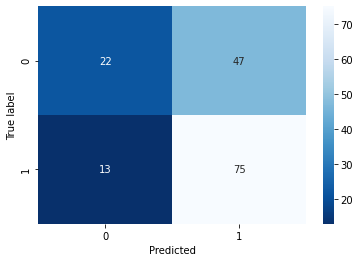

In [70]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

В данной задаче лучшей метрикой будет precission,тк не купить корову с не вкусным молоком, важнее чем не купить корову с вкусным.Иначе говоря, нам надо минимизировать ошибки 1 порядка.

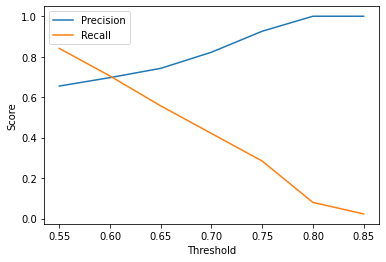

In [71]:
y_probs = clf.predict_proba(x_test_scaled_encoded)[:, 1]

thresholds = np.arange(0.55, 0.9, 0.05)

precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_probs > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precision_scores.append(precision)
    recall_scores.append(recall)

plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

Этот график показывает, как будет менятся precession и recall в зависимостти от значения порога.В нашем случае стоит выбрать порог 0.8 для устранения ошибок 1 рода.

In [72]:
RANDOM_STATE = 42

X = farm.drop('вкус_молока', axis=1)
y = farm['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

clf = LogisticRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first',handle_unknown='ignore')

scaler.fit(X_train[numerical_columns])
encoder.fit(X_train[categorical_columns])

x_train_scaled = scaler.transform(X_train[numerical_columns])
x_test_scaled = scaler.transform(X_test[numerical_columns])

x_train_encoded = encoder.transform(X_train[categorical_columns])
x_test_encoded = encoder.transform(X_test[categorical_columns])

x_train_scaled_encoded = np.concatenate([x_train_scaled, x_train_encoded.toarray()], axis=1)
x_test_scaled_encoded = np.concatenate([x_test_scaled, x_test_encoded.toarray()], axis=1)

clf.fit(x_train_scaled_encoded, y_train)
y_probs = clf.predict_proba(x_test_scaled_encoded)[:, 1]
predictions = (y_probs > 0.8).astype(int)
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f'Accuracy: {acc}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.4840764331210191
Precision: 1.0000
Recall: 0.0795


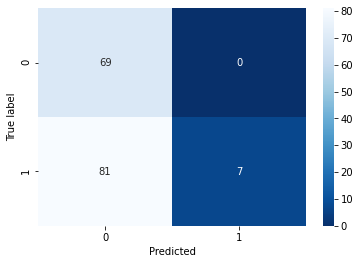

In [73]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

## Итоговые выводы

In [74]:
spo_threshold = 0.90 

buy_cow['спо_binary'] = (buy_cow['спо'] > spo_threshold).astype(int)
buy_cow['эке_квадрат'] = (buy_cow['эке'] ** 2).astype(float)
farm_full['вкус_молока'] = farm_full['вкус_молока'].replace({'вкусно':1,'не вкусно':0})

numerical_columns = ['эке_квадрат','сырой_протеин']
categorical_columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_binary','имя_папы']

In [75]:
RANDOM_STATE = 42

X = farm_full.drop('вкус_молока', axis=1)
y = farm_full['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

clf = LogisticRegression()
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first',handle_unknown='ignore')

scaler.fit(X_train[numerical_columns])
encoder.fit(X_train[categorical_columns])

x_train_scaled = scaler.transform(X_train[numerical_columns])
x_test_scaled = scaler.transform(X_test[numerical_columns])

x_train_encoded = encoder.transform(X_train[categorical_columns])
x_test_encoded = encoder.transform(X_test[categorical_columns])

x_train_scaled_encoded = np.concatenate([x_train_scaled, x_train_encoded.toarray()], axis=1)
x_test_scaled_encoded = np.concatenate([x_test_scaled, x_test_encoded.toarray()], axis=1)

clf.fit(x_train_scaled_encoded, y_train)

X_test_new = buy_cow

x_test_new_scaled = scaler.transform(X_test_new[numerical_columns])
x_test_new_encoded = encoder.transform(X_test_new[categorical_columns])
x_test_new_scaled_encoded = np.concatenate([x_test_new_scaled, x_test_new_encoded.toarray()], axis=1)
y_probs = clf.predict_proba(x_test_new_scaled_encoded)[:, 1]

predictions_taste = clf.predict(x_test_new_scaled_encoded)
predictions_taste = (y_probs > 0.8).astype(int)
predictions_taste

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Модель предсказала, что коровы ЭкоФермы не несут вкусное молоко

In [76]:
buy_cow['удой'] = predictions_milk_yiald
buy_cow['вкус'] = predictions_taste
buy_cow.shape

(20, 14)

In [77]:
should_buy = buy_cow[(buy_cow['удой'] > 6000) & (buy_cow['вкус'] == 1)]
should_buy.shape

(0, 14)

Отсортировав данные видим, что требования фермера не удовлетворяет ни одна корова ЭкоФермы.

### Результаты работы моделей для фермера:

<h5>Результаты работы моделей</h5>
<div>Линейная регрессия: Модель предсказывает удой молока на основе признаков. Она может быть использована для оценки ожидаемого удоя от коровы.</div>
<div>Логистическая регрессия: Модель предсказывает вероятность вкуса молока (1 - хороший вкус, 0 - плохой вкус). Это может помочь фермеру выбирать коров с лучшим вкусом молока.</div> 
<h5>Рекомендации фермеру</h5>
<div>Фермеру рекомендуется использовать обе модели для проверки коров перед покупкой, так же рекомендуется добавить новые данные, которые помогут улучшить работу модели.К примеру для улучшения модели по оценке вкуса молока подойдут данные о питании коров,как хранится молоко, стерелизуется ли молоко и тд.</div>
<h5>Выводы по моделям</h5>
<div>Линейная регрессия подходит,для работы по прогназирования количественных переменных(в нашем случае удоя), а логистическая для категориальных(в нашем случае вкус молока).Для улучшения качества моделей можно добавить новых признаков,а для улучшения результатов овзможно стоит использовать более сложные модели.Во время работы с этими моделями я пользовался метриками R2, accurancy,mae,mse,rmse,percission и recall.Все это важные метрики для оценки рисков модели.</div>